# pytorch computer vision

## 0. computer vision libraries in pytorch

In [ ]:
# import pytorch
import torch
from torch import nn

# import vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib 4 vizualisations
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## 1. getting a dataset

In [ ]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True,  # do we want the training dataset
    download=True, # do we want to download
    transform=torchvision.transforms.ToTensor(), # how do we want to transfrom the data
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 112MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.22MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 60.6MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 34.5MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]

In [ ]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the shape of our image
image.shape, label # label is only an integer hence no shape

(torch.Size([1, 28, 28]), 9)

In [ ]:
 print(f"image shape: {image.shape} -> [color_channels, height, width]")
 print(f"image label: {class_names[label]}")

image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
image label: Ankle boot


In [ ]:
image.squeeze().shape

torch.Size([28, 28])

### 1.2 vizualisong our data

image shape: torch.Size([1, 28, 28])


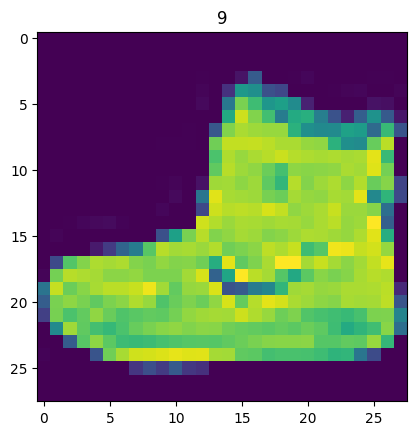

In [ ]:
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze());
plt.title(label);

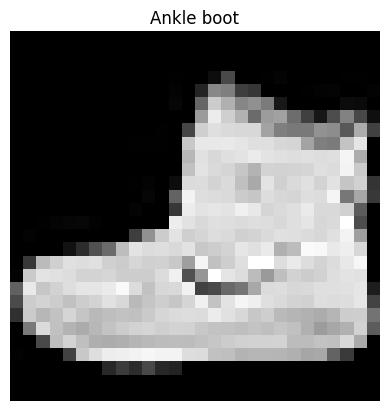

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

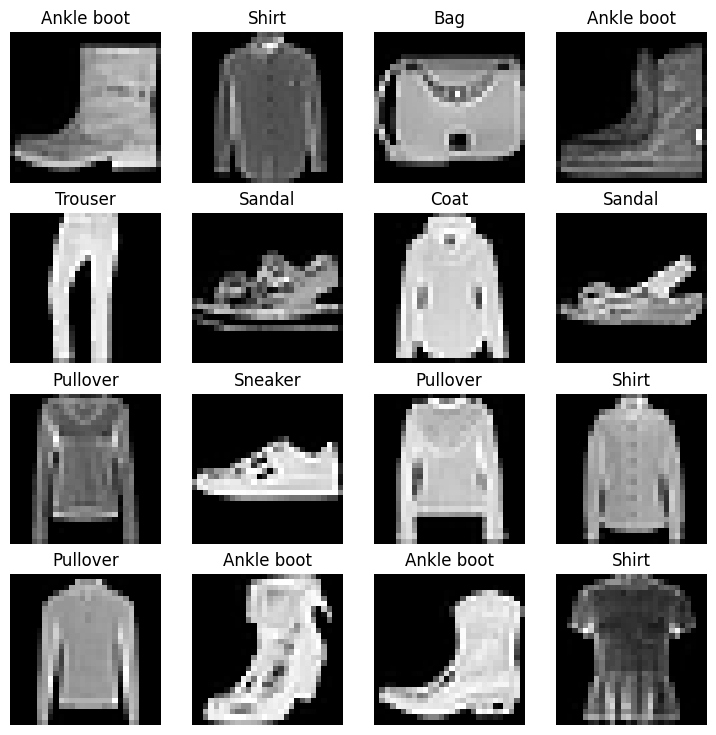

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. prepare dataloader

In [ ]:
from torch.utils.data import DataLoader

# setup the batch size
BATCH_SIZE = 32

# turn datasset into iterables(bathces)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f9505b376e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9505b36e70>)

In [ ]:
# lets check out what we've created
print(f"dataloader: {train_dataloader, test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"leangth of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7f9505b376e0>, <torch.utils.data.dataloader.DataLoader object at 0x7f9505b36e70>)
length of train_dataloader: 1875 batches of 32
leangth of test_dataloader: 313 batches of 32


In [ ]:
# check out whats inside the train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 6, label size: torch.Size([])


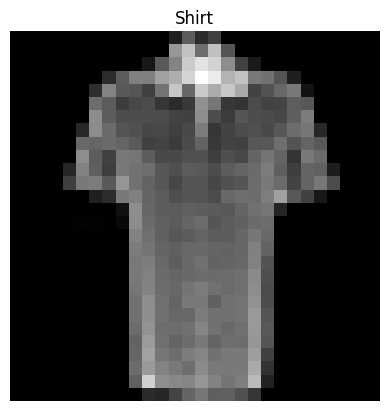

In [ ]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);
print(f"image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

## 3. model 0: build a baseline model

In [ ]:
# create a flatten later
flatten_model = nn.Flatten()

# get a single sample
x= train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass

# print out what's happened
print(f"shape b4 flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape b4 flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # no of units in rhe hidden layer
    output_shape=len(class_names), # one for every class
    ).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand(1, 1, 28,28)
model_0(dummy_x)

tensor([[-0.1680,  0.2322,  0.2701,  0.0274,  0.6386,  0.3092,  0.3212,  0.2810,
         -0.1581, -0.1608]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 setup loss, optimizer and evaluation metrics

In [ ]:
import requests
from pathlib import Path

# download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("downloading helper_fuctions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

downloading helper_fuctions.py


In [ ]:
# imprt the accuracy metrics
from helper_functions import accuracy_fn

# setup loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 creating a function to time our experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """prints diff btn start and end time"""
  total_time = end - start
  print(f"train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

train time on cpu: 0.000 seconds


3.873899999007335e-05

### 3.3 creating a training loop and training a model on batches of data

In [ ]:
# import tqdm for progression bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# se the no of epochs... keep it small for faster training time
epochs = 3

# create training ans test loop
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n-----")
  ### training
  train_loss = 0
  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print out whats happening
    if batch % 400 == 0:
      print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # divide total train loss by length of train dataloader
  train_loss /=  len(train_dataloader)

  ### testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X_test)

      # 2. calculate the loss... accumulatively
      test_loss += loss_fn(test_pred, y_test)

      # 3. calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss avg per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc per batch
    test_acc /= len(test_dataloader)

  # print out whats happening
  print(f"\ntrain loss: {train_loss:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 =   print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 3
-----
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

train loss: 0.5904 | test loss: 0.5095 | test acc: 82.0387
epoch: 3
-----
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

train loss: 0.4763 | test loss: 0.4799 | test acc: 83.1969
epoch: 3
-----
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

train loss: 0.4550 | test loss: 0.4766 | test acc: 83.4265
train time on cpu: 27.151 seconds


## 4. make predictions and get model_0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """returns a dict containing the results of model predicting on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the avg loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc
            }

# calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. setup device agnostice code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. building a better model with non-linearity

In [ ]:
# create a model with non-linear and liner layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                 out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device) # send to the gpu if available

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 functionizing training/testing loop

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """performs a training with model trying to learn on data_loader """
  train_loss, train_acc = 0, 0

  # put model into training mode
  model.train()

  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # put data on the target device
    X, y = X.to(device), y.to(device)

    # 1. forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. calculate the loss and acc (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits to prediction labels

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  # divide total train loss and acc by length of train dataloader
  train_loss /=  len(train_dataloader)
  train_acc /= len(data_loader)
  print(f"train loss: {train_loss:.5f} | train_acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """performs a testing loopt step on model going over data_loader"""
  test_loss, test_acc = 0, 0

  # put the model in eval mode
  model.eval()

  # turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. forward pass
      test_pred = model(X)

      # 2. calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test loss: {test_loss:.5f} | test_acc: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n--------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
--------
train loss: 1.09199 | train_acc: 61.34%
test loss: 0.95636 | test_acc: 65.00%

epoch: 1
--------
train loss: 0.78101 | train_acc: 71.93%
test loss: 0.72227 | test_acc: 73.91%

epoch: 2
--------
train loss: 0.67027 | train_acc: 75.94%
test loss: 0.68500 | test_acc: 75.02%

train time on None: 29.761 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """returns a dict containing the results of model predicting on data loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make our data device agnostic
      X, y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the avg loss and acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc
            }

In [ ]:
# get model_1 results dict
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## model 2: building convolutional neural networks (CNN)

In [ ]:
# create a CNN
class FashionMNISTModelV2(nn.Module):
  """model architecture that replicates the TinyVGG model from CNN explainer website"""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride = 1,
            padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
       nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
       nn.ReLU(),
       nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    ).to(device)

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

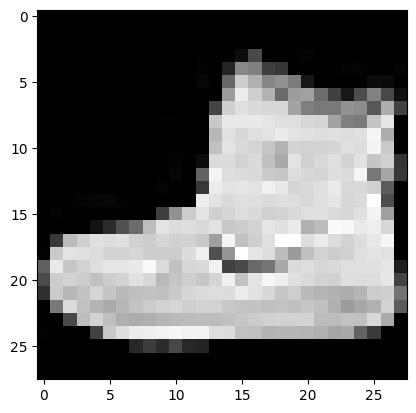

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28)).unsqueeze(0)
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [ ]:
# pass image thru model
model_2(rand_image_tensor.to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 stepping through `nn.Conv2d()`


In [ ]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"image batch shape: {image.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test image:\n {test_image}")

image batch shape: torch.Size([1, 28, 28])
single image shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [ ]:
torch.manual_seed(42)
# create a singel conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 stepping through `nn.MaxPool2d()`

In [ ]:
# print out the original image shape
print(f"test image original shape: {test_image.shape}")
print(f"test image with unsqueezed dim: {test_image.unsqueeze(0).shape}")

# create a simple nn.MaxPoo2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the conv layer
test_image_thru_conv = conv_layer(test_image)
print(f"shape after going thru conv_layer(): {test_image_thru_conv.shape}")

# pass data thru the max pool layer
test_image_thru_conv_and_max_pool = max_pool_layer(test_image_thru_conv)
print(f"shape after coing thru conv and max pool layer: {test_image_thru_conv_and_max_pool.shape}")

test image original shape: torch.Size([3, 64, 64])
test image with unsqueezed dim: torch.Size([1, 3, 64, 64])
shape after going thru conv_layer(): torch.Size([10, 62, 62])
shape after coing thru conv and max pool layer: torch.Size([10, 31, 31])


In [ ]:
torch.manual_seed(42)
# create a random tensor with a similar no of dims to our img
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nrandom tensor:\n {random_tensor}")
print(f"random tensor shape: {random_tensor.shape}")

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nmax pool tensor:\n {max_pool_tensor}")
print(f"max pool tensor shape: {max_pool_tensor.shape}")


random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape: torch.Size([1, 1, 2, 2])

max pool tensor:
 tensor([[[[0.3367]]]])
max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 setup a loss function and optimizer for model_2

In [ ]:
# setup loss function/eval_metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 training and testing model_2 using our training and testing functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train and test model
epochs =3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n--------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
--------
train loss: 0.59317 | train_acc: 78.38%
test loss: 0.40281 | test_acc: 85.45%

epoch: 1
--------
train loss: 0.36341 | train_acc: 86.84%
test loss: 0.34523 | test_acc: 87.43%

epoch: 2
--------
train loss: 0.32431 | train_acc: 88.18%
test loss: 0.32854 | test_acc: 88.29%

train time on None: 35.232 seconds


In [ ]:
# get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32853540778160095,
 'model_acc': 88.28873801916933}

## 8. compare results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.328535,88.288738


In [ ]:
# add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [ ]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.150672
1,FashionMNISTModelV1,0.685001,75.019968,29.761272
2,FashionMNISTModelV2,0.328535,88.288738,35.231688


Text(0, 0.5, 'model')

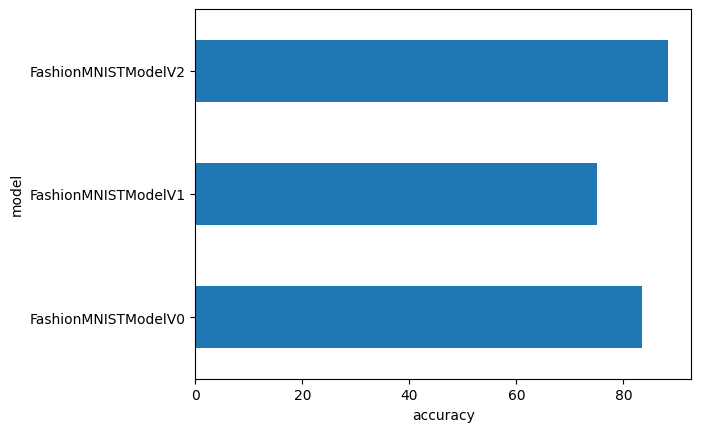

In [ ]:
# visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")

## 9. make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample(add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass (model ouput raw logits)
      pred_logit = model(sample)

      # get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)


In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

  # view the first sample shape
  test_samples[0].shape

Text(0.5, 1.0, 'Sandal')

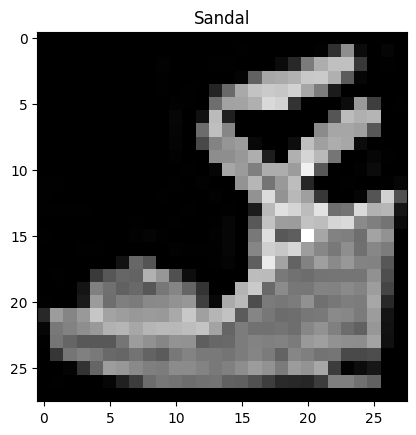

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# view the first two prediction probabilities
pred_probs[:2]

tensor([[1.3675e-05, 5.6805e-07, 8.3789e-06, 5.0984e-06, 2.0546e-07, 9.9991e-01,
         8.8731e-06, 2.7222e-06, 4.4930e-05, 6.7343e-06],
        [9.8295e-01, 1.1480e-05, 8.7705e-04, 4.4834e-03, 2.1025e-05, 2.1905e-07,
         1.1613e-02, 1.1841e-06, 4.5434e-05, 1.7528e-06]])

In [ ]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 7, 0, 0, 1, 4, 3, 7])

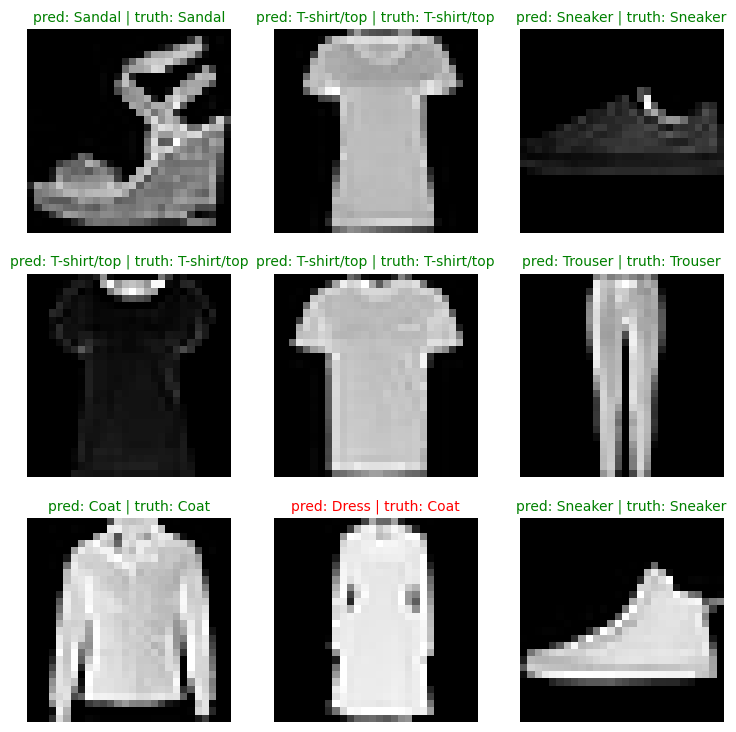

In [ ]:
# plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in  enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target imagw
  plt.imshow(sample.squeeze(), cmap="gray")

  # find the predcition (in test form eg sandal)
  # Access the class name from the list using square brackets
  pred_label = class_names[pred_classes[i]]

  # get the truth label... in text form
  truth_label = class_names[test_labels[i]]

  # create title for the plot
  title_text = f"pred: {pred_label} | truth: {truth_label}"

  # check for equality between pred and truth and change color of title test
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    # Correct the typo in plt.titel
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 10. making a confusion metrics for further prediction evaluation

In [ ]:
# import tqdm.suto
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="making predictions..."):
    #send data and targets to target device
    X, y = X.to(device), y.to(device)
    # do the foward pass
    y_logit = model_2(X)
    #turn preds from logits to pred probs to pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 0, 1, 8])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# install torchmetrics
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 35.1 MB/s eta 0:00:00
mlxtend version: 0.23.4


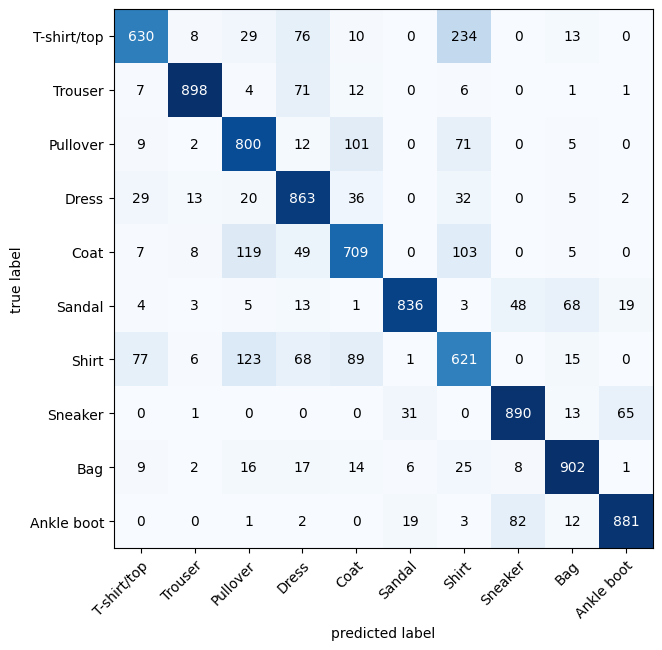

In [ ]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. set up confusion matrix instance and compare preds to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

# 3. plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matlplot lib likes working with numpy
    class_names=class_names,
    figsize=(10 ,7)
)

## 11. save and load best performing model

In [ ]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the mode state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# load in the saved state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the model to the target decive
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32853540778160095,
 'model_acc': 88.28873801916933}

In [ ]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]), torch.tensor(loaded_model_2_results["model_loss"]), atol=1e-02)

tensor(True)